<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/assignment_7_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

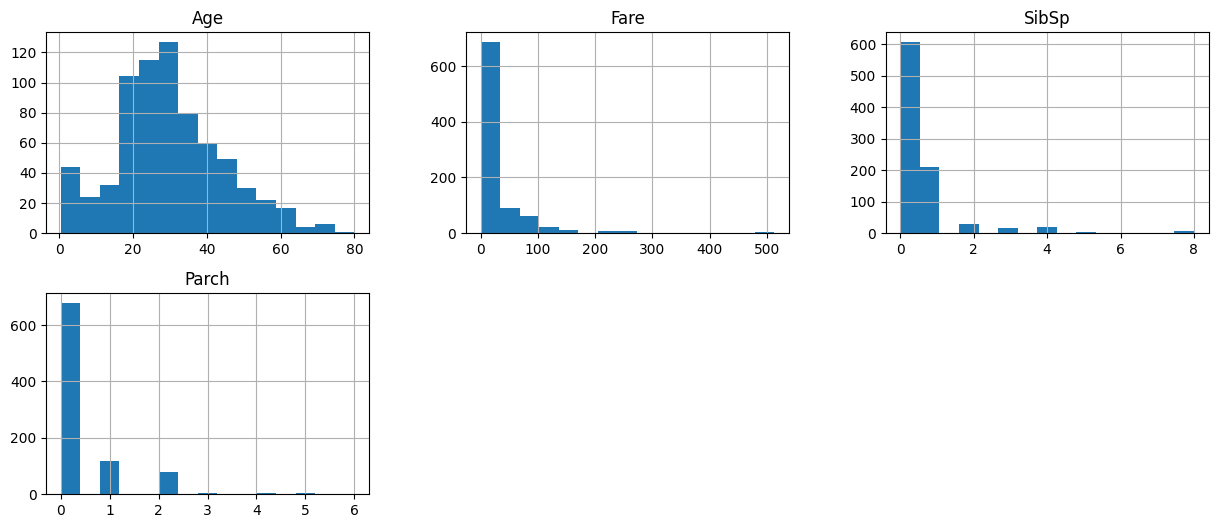

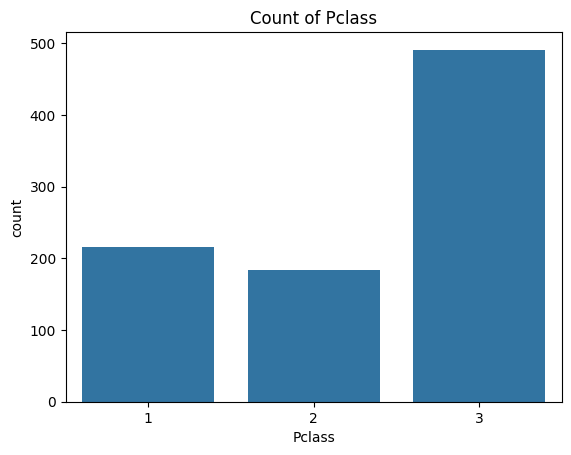

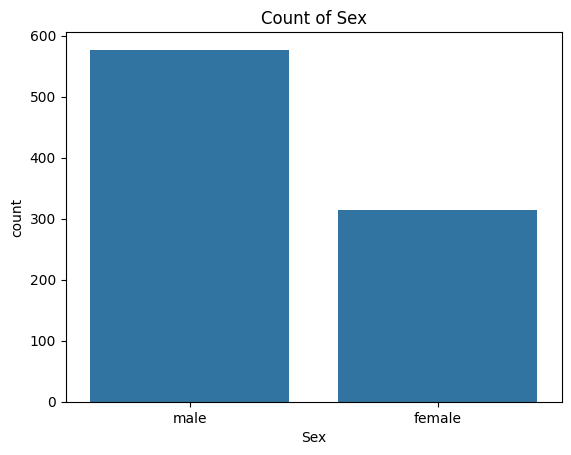

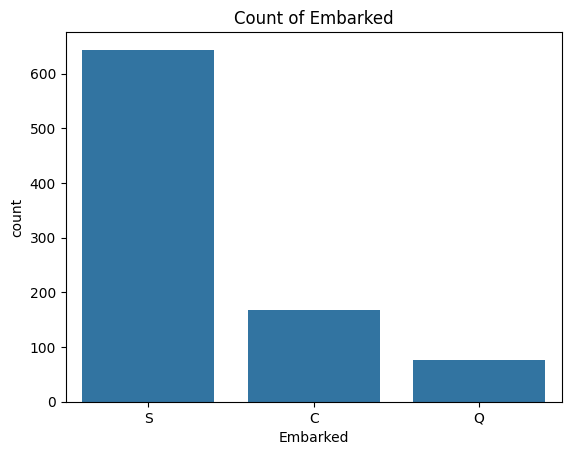

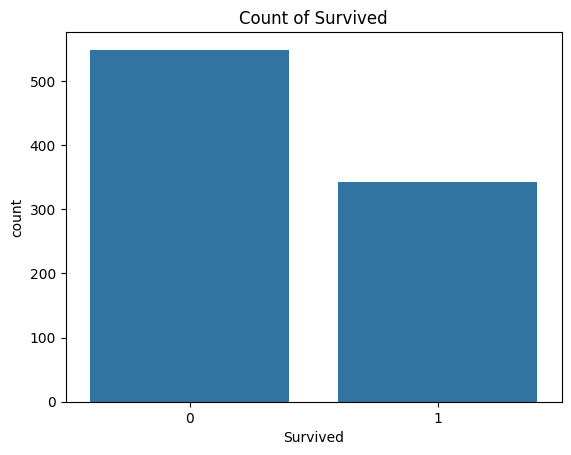

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')
# Display the first few rows of the training data
print(train_df.head())
print(train_df.info())
print(train_df.describe())
# Visualize the distribution of numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
train_df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()
# Visualize the count of categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived']
for feature in categorical_features:
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()
print(train_df.isnull().sum())


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])
imputer = SimpleImputer(strategy='most_frequent')
# The following lines were modified to fix the error
train_df['Embarked'] = imputer.fit_transform(train_df[['Embarked']]).ravel() # ravel() flattens the 2D array to 1D
test_df['Embarked'] = imputer.transform(test_df[['Embarked']]).ravel() # ravel() flattens the 2D array to 1D

# For 'Fare' in test data
test_df['Fare'] = imputer.fit_transform(test_df[['Fare']])

# Encode categorical variables
encoder = LabelEncoder()
for feature in ['Sex', 'Embarked']:
    train_df[feature] = encoder.fit_transform(train_df[feature])
    test_df[feature] = encoder.transform(test_df[feature])

# Check if columns exist before dropping
if 'Name' in train_df.columns and 'Ticket' in train_df.columns and 'Cabin' in train_df.columns:
    train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
if 'Name' in test_df.columns and 'Ticket' in test_df.columns and 'Cabin' in test_df.columns:
    test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC-AUC Score: 0.88


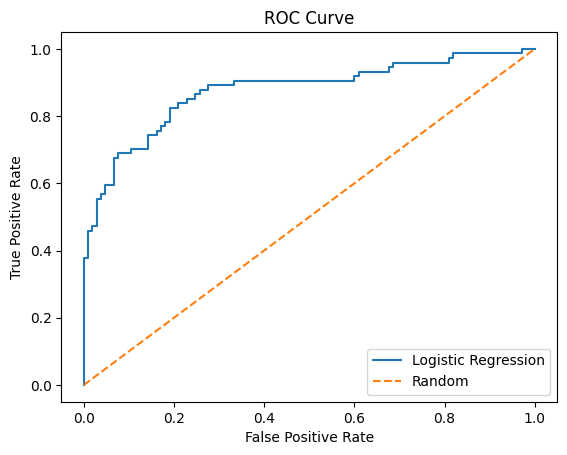

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Get the coefficients and feature names
coefficients = pd.Series(model.coef_[0], index=X.columns)

# Display the coefficients
print(coefficients.sort_values(ascending=False))

# Interpret the coefficients
print("Feature significance in predicting survival:")
for feature, coef in coefficients.sort_values(ascending=False).items():
    print(f"{feature}: {'increases' if coef > 0 else 'decreases'} the likelihood of survival")


Fare           0.002588
PassengerId    0.000352
Age           -0.031139
Parch         -0.130090
Embarked      -0.223006
SibSp         -0.289057
Pclass        -0.923344
Sex           -2.620792
dtype: float64
Feature significance in predicting survival:
Fare: increases the likelihood of survival
PassengerId: increases the likelihood of survival
Age: decreases the likelihood of survival
Parch: decreases the likelihood of survival
Embarked: decreases the likelihood of survival
SibSp: decreases the likelihood of survival
Pclass: decreases the likelihood of survival
Sex: decreases the likelihood of survival


In [ ]:
# Save this script as `app.py`
!pip install streamlit
import streamlit as st
import pickle

# Load the trained model (make sure to save it after training)
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

st.title("Titanic Survival Prediction")

# Create input fields
pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
age = st.slider("Age", 0, 80, 25)
sibsp = st.slider("Number of Siblings/Spouses Aboard (SibSp)", 0, 8, 0)
parch = st.slider("Number of Parents/Children Aboard (Parch)", 0, 6, 0)
fare = st.number_input("Passenger Fare (Fare)", 0.0, 513.0, 32.2)
embarked = st.selectbox("Port of Embarkation (Embarked)", ['C', 'Q', 'S'])

# Convert input data to the format the model expects
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [1 if sex == 'male' else 0],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [0 if embarked == 'C' else 1 if embarked == 'Q' else 2]
})

# Predict survival
if st.button("Predict"):
    prediction = model.predict(input_data)
    st.write("Survived" if prediction[0] == 1 else "Not Survived")

# Run the app using `streamlit run app.py`


2024-08-27 07:28:42.158 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-27 07:28:42.161 Session state does not function when running a script without `streamlit run`


In [ ]:
import pickle

# Save the model
filename = 'logistic_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

Interview Questions Solutions
1. What is the difference between precision and recall?
Precision and Recall are two important metrics used to evaluate the performance of a binary classification model, such as logistic regression.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Out of all the positive predictions, how many were actually positive?" Precision is important in situations where the cost of a false positive is high.

Precision
=
True Positives (TP)
True Positives (TP)
+
False Positives (FP)
Precision=
True Positives (TP)+False Positives (FP)
True Positives (TP)
​

Recall (also known as Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "Out of all the actual positives, how many did we correctly predict as positive?" Recall is important in situations where the cost of a false negative is high.

Recall
=
True Positives (TP)
True Positives (TP)
+
False Negatives (FN)
Recall=
True Positives (TP)+False Negatives (FN)
True Positives (TP)
​

Key Differences:

Precision focuses on the quality of positive predictions, whereas Recall focuses on the ability to capture all positive cases.
High Precision means fewer false positives, while high Recall means fewer false negatives.
Precision is more important in cases where a false positive is more undesirable than a false negative (e.g., spam detection), while recall is more important when missing a true positive is more costly than a false positive (e.g., cancer detection).
2. What is cross-validation and why is it important in binary classification?
Cross-validation is a technique used to assess the generalizability and robustness of a statistical model on an independent dataset. It involves partitioning the original data into a set of training and testing datasets to evaluate the model's performance.

Why Cross-Validation is Important:

Prevent Overfitting: Cross-validation helps in evaluating the model's performance on different subsets of the data. This ensures that the model generalizes well to unseen data rather than overfitting to the training data.

Provides Robust Performance Estimates: By using different splits of the data, cross-validation provides a more accurate estimate of a model's performance compared to a single train-test split.

Helps in Model Selection: It allows comparing the performance of different models or hyperparameter settings, making it easier to select the best model for the specific problem.

Stability of the Model: It provides an indication of how sensitive the model is to the variability in the data. If the performance is consistent across different folds, the model is considered stable.

Common Types of Cross-Validation:

k-Fold Cross-Validation: The dataset is divided into
𝑘
k equally sized subsets (folds). The model is trained on
𝑘
−
1
k−1 folds and tested on the remaining fold. This process is repeated
𝑘
k times, with each fold used exactly once as the test set. The average performance across all
𝑘
k iterations is used to estimate the model's effectiveness.

Stratified k-Fold Cross-Validation: Similar to k-Fold, but the folds are made by preserving the percentage of samples for each class. This is particularly important in binary classification when the classes are imbalanced.

Leave-One-Out Cross-Validation (LOOCV): A special case of k-Fold where
𝑘
k is equal to the number of data points. Each observation is used as a test set exactly once, and all remaining data points are used for training.

Repeated k-Fold Cross-Validation: The k-Fold cross-validation process is repeated several times with different random splits of the data, providing an even more robust estimate of model performance.